# Author: Стурейко Игорь
## Project: Geekbrains.MatStat
## Lesson 04 - Непрерывное распределение
## Date: 2020-07-03

In [8]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

## 1. О непрерывной равномерно распределённой случайной величине B известно, что её дисперсия равна 0.2. Можно ли найти правую границу величины B и её среднее значение зная, что левая граница равна 0.5? Если да, найдите их.

### Решение:

Решить систему уравнений относительно М и b:

$$\begin{cases}
\displaystyle M=\frac{0.5+b}{2}\\
\displaystyle 0.2=\frac{(b-0.5)^2}{12}
\end{cases} \Rightarrow 
\begin{cases}
M = 1 \pm \sqrt{0.6}\\
b = 2(1 \pm \sqrt{0.6}) - 12
\end{cases}$$

Поскольку $b > a, \Rightarrow \begin{cases}
M = 1 + \sqrt{0.6}\\
b = 2(1 + \sqrt{0.6}) - 12
\end{cases}$

## 2. Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.
Подсказка. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.

### а) Среднеквадратичное отклонение

In [34]:
for i in np.linspace(0.02, 0.05, 10000):
    s = stats.norm.cdf(1, loc=1.06, scale=i)
    if s > 0.05:
#         print(f'cdf = {s}')
        print(f'scale = {i}')
        break

scale = 0.03647764776477648


### b) Процент коробок имеющих массу больше 1.1

In [47]:
p = 1-stats.norm.cdf(1.1, loc=1.06, scale=0.03647764776477648)
print(f'Процент коробок имеющих массу больше 1.1: {round(p*100, 2)}%')

Процент коробок имеющих массу больше 1.1: 13.64%


## 3. Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.
Массой самой коробки можно пренебречь.

In [55]:
m = 13
s = 1/3
print(f'Мат ожидание для одной конфеты = {m}')
print(f'Дисперсия для одной конфеты = {round(s, 4)}')

Мат ожидание для одной конфеты = 13
Дисперсия для одной конфеты = 0.3333


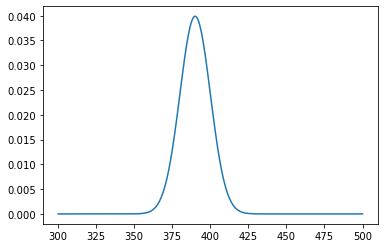

In [53]:
ox = np.linspace(300, 500, 1000)
oy = stats.norm.pdf(ox, loc=m*30, scale=30*s)

plt.plot(ox, oy)
plt.show()

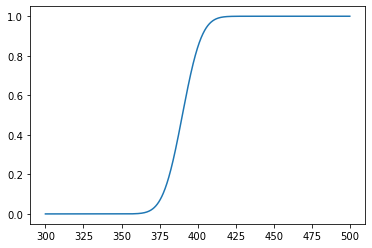

In [57]:
ox = np.linspace(300, 500, 1000)
oy = stats.norm.cdf(ox, loc=m*30, scale=30*s)

plt.plot(ox, oy)
plt.show()

In [82]:
print(f'а) Вероятность, что масса коробки меньше 390 гр = {stats.norm.cdf(390, loc=m*30, scale=30*s)*100}%')
print(f'б) Вероятность, что масса коробки больше 390 гр = {round((1-stats.norm.cdf(395, loc=m*30, scale=30*s)), 4)*100}%')
print(f'в) Вероятность, что масса коробки больше 390 гр = {round(stats.norm.cdf(400, loc=m*30, scale=30*s) - stats.norm.cdf(380, loc=m*30, scale=30*s), 4)*100}%')

а) Вероятность, что масса коробки меньше 390 гр = 50.0%
б) Вероятность, что масса коробки больше 390 гр = 30.85%
в) Вероятность, что масса коробки больше 390 гр = 68.27%
